<a href="https://colab.research.google.com/github/salazarmaria/Notas-de-IA/blob/main/Clasificaci%C3%B3n_de_d%C3%ADgitos/notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits # Importo la función para cargar el dataset de dígitos escritos a mano

digits = load_digits() # Cargo el dataset


In [2]:
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR) #Muestra una descripción detallada del dataset, incluyendo número de muestras, dimensiones, y explicación de los atributos


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
index = 0 # Defino el índice de la imagen que quiero revisar


In [6]:
image = digits.images[index] # Selecciono la imagen y su etiqueta correspondiente
label = digits.target[index]


In [7]:
print(image) # Muestro la matriz de píxeles de la imagen


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


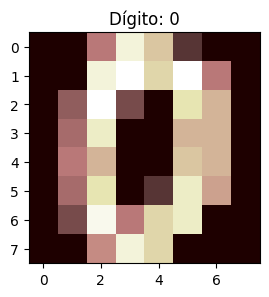

In [20]:
import matplotlib.pyplot as plt # Importo matplotlib para visualizar imágenes

plt.figure(figsize=(3, 3)) # Creo una figura pequeña para mostrar la imagen
plt.imshow(image, cmap=plt.cm.pink) # Muestro la imagen en escala de rosa
plt.title(f'Dígito: {label}')
plt.show()


In [21]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [22]:
digits.data.shape

(1797, 64)

In [9]:
import tensorflow as tf # Importo TensorFlow y herramientas para dividir los datos y codificar las etiquetas
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(   # Divido los datos en entrenamiento y prueba (80% - 20%)
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)  # Aplico one-hot encoding a las etiquetas para usarlas en la red neuronal
y_test = to_categorical(y_test, num_classes=10)


In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [10]:
print(X_train.shape) # Compruebo las dimensiones de los datos de entrenamiento y prueba
print(X_test.shape)


(1437, 64)
(360, 64)


In [11]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8)) # Redimensiono un vector de 64 valores a una matriz 8x8 para verlo como imagen
print(reshaped_tensor)


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor) # Redimensiono nuevamente para visualizar mejor y redondeo valores para simplificar

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [24]:
X_train.shape[0]

1437

In [14]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

In [25]:
X_train[0]

<tf.Tensor: shape=(8, 8), dtype=float64, numpy=
array([[ 0.        , -0.34169755, -0.46336049,  0.50836462, -2.54590607,
        -1.03722581, -0.40623424, -0.13101874],
       [-0.06103492, -0.61725402,  0.30881425,  0.00348328, -2.18152552,
        -1.35608548, -0.52465505, -0.13336005],
       [-0.04991522,  0.12851911,  1.08857992, -0.19343737, -1.16010978,
        -1.27307852, -0.552537  , -0.11409248],
       [-0.03733267,  0.86365151,  1.13744682, -1.16195968, -1.60835913,
        -1.28296188, -0.62554872, -0.04573894],
       [ 0.        ,  1.09151514,  1.34318585, -1.12678131, -0.90106555,
        -1.13185292, -0.81347241,  0.        ],
       [-0.06519029,  0.82828946,  1.39981472, -0.82540858,  0.69177178,
         1.17865528, -0.33784246, -0.09403434],
       [-0.03963009,  0.15955797,  1.14244768,  0.64507954, -1.42282149,
         0.68917912,  1.47990131, -0.21608405],
       [-0.02638899, -0.30677646, -0.49962244, -0.246272  ,  0.84804385,
         1.05270303,  0.45952251

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),  # Capa convolucional con 32 filtros 3x3 y activación
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)), # Capa de max pooling para reducir dimensiones
    Flatten(),
    Dense(128, activation='relu'),  # Capa densa con 128 neuronas y activación
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [17]:
model.compile(     # Compilo el modelo indicando optimizador, función de pérdida y métricas
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(   # Entreno el modelo con 10 épocas, batch de 32 y validación del 20%
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4542 - loss: 1.9749 - val_accuracy: 0.8507 - val_loss: 0.9110
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8959 - loss: 0.6717 - val_accuracy: 0.9028 - val_loss: 0.4135
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9376 - loss: 0.2857 - val_accuracy: 0.9306 - val_loss: 0.2857
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9661 - loss: 0.1678 - val_accuracy: 0.9375 - val_loss: 0.2591
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9821 - loss: 0.1109 - val_accuracy: 0.9549 - val_loss: 0.2049
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9796 - loss: 0.0965 - val_accuracy: 0.9479 - val_loss: 0.1658
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9867 - loss: 0.0758 - val_accuracy: 0.9618 - val_loss: 0.1420
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9927 - loss: 0.0500 - val_accuracy: 0.9653 - val_l

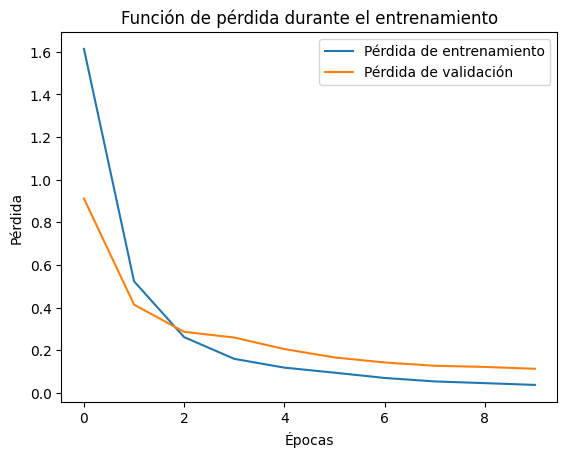

In [19]:
import matplotlib.pyplot as plt  # Grafico la pérdida de entrenamiento y validación por época

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9705 - loss: 0.0581  
Loss: 0.07037748396396637, Accuracy: 0.9694444537162781


In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


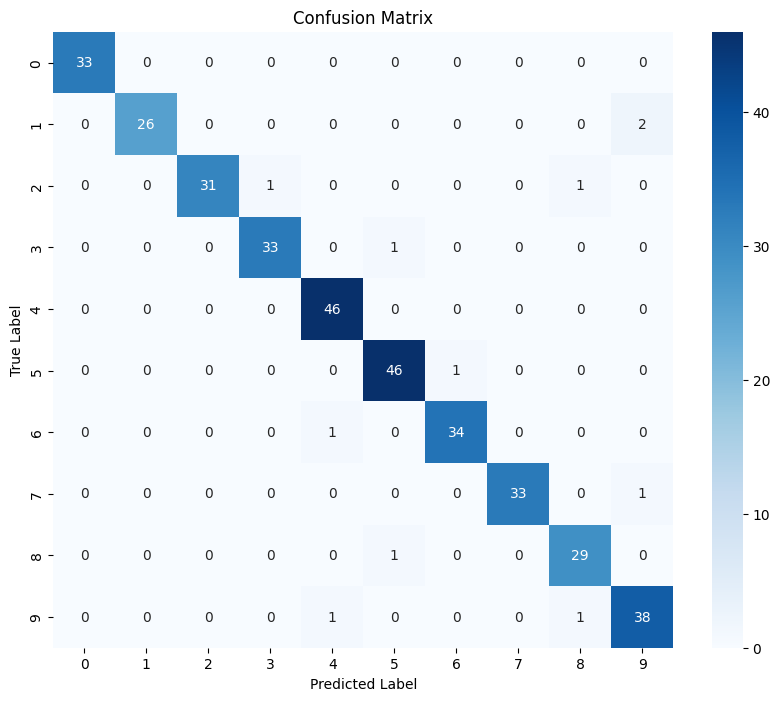

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9285714285714286
Class 2: 0.9393939393939394
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 0.9666666666666667
Class 9: 0.95


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt # Visualizo la matriz de confusión

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')